In [3]:
pip install opencv-python

  Using cached opencv_python-4.7.0.68-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf

In [4]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

step one: <pre>lets pre proccess the image
I will use agumentation to multiply the number of elements </pre>

In [6]:
# import albumentations as alb
import cv2
import os
import uuid
import numpy as np
from sklearn.utils import shuffle
from random import randint

In [61]:

transform = alb.Compose([
    alb.RandomCrop(width=150, height=150),
    alb.HorizontalFlip(p=0.5),
    alb.RandomGamma(p=0.2), 
    alb.RGBShift(p=0.2), 
    alb.VerticalFlip(p=0.5)]
)


<pre>
image_dir = 'train_data'

for image_class in os.listdir(image_dir):
    for image in os.listdir(os.path.join(image_dir, image_class)):
        image_path = os.path.join(image_dir, image_class, image)
        img = cv2.imread(image_path)
        img = tf.image.resize(img, (150,150))
        img = np.array(img)
        try:
            for i in range(50):
                agumented = transform(image=img)
                cur_path = os.path.join(image_dir, image_class, f'{str(uuid.uuid1())}.jpg')
                cv2.imwrite(cur_path, agumented['image'])
                print("succes")
        except Exception as e:
            print(str(e))
            </pre>
        

In [62]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'five_birr': #Folder contain Glacier Images get the '2' class label.
            label = 0
        elif labels == 'ten_birr':
            label = 1
        elif labels == 'fifty_birr':
            label = 2
        elif labels == 'hundred_birr':
            label = 3
        elif labels == 'two_hundred_birr':
            label = 4
            
        image_folder = os.path.join(directory , labels)
        for image_file in os.listdir(image_folder): #Extracting the file name of the image from Class Label folder
            path = os.path.join(image_folder , image_file)
            image = cv2.imread(path) #Reading the image (OpenCV)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(224,224)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'five_birr', 1:'ten_birr', 2:'fifty_birr', 3:'hundred_birr', 4:'two_hundred_birr'}
    return labels[class_code]

step two: <pre>change the image to numpy array</pre>

In [76]:
Images, Labels = get_images(os.path.join('data')) #Extract the training images from the folders.
Images = np.array(Images)/255 #converting the list of images to numpy array and also normalize the the imafe
Labels = np.array(Labels)




In [96]:
train_data,train_label, test_data, test_label = Images[133:], Labels[133:], Images[:133], Labels[:133]

In [64]:
import imghdr

In [57]:
# img = os.path.join('data', 'five_birr', '1.jpg')
# img = cv2.imread(img)
# image_exts = ['jpeg', 'jpg', 'png', 'bmp']


In [58]:
# plot.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plot.show()

In [65]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (669, 224, 224, 3)
Shape of Labels: (669,)


In [66]:
from matplotlib import pyplot as plt

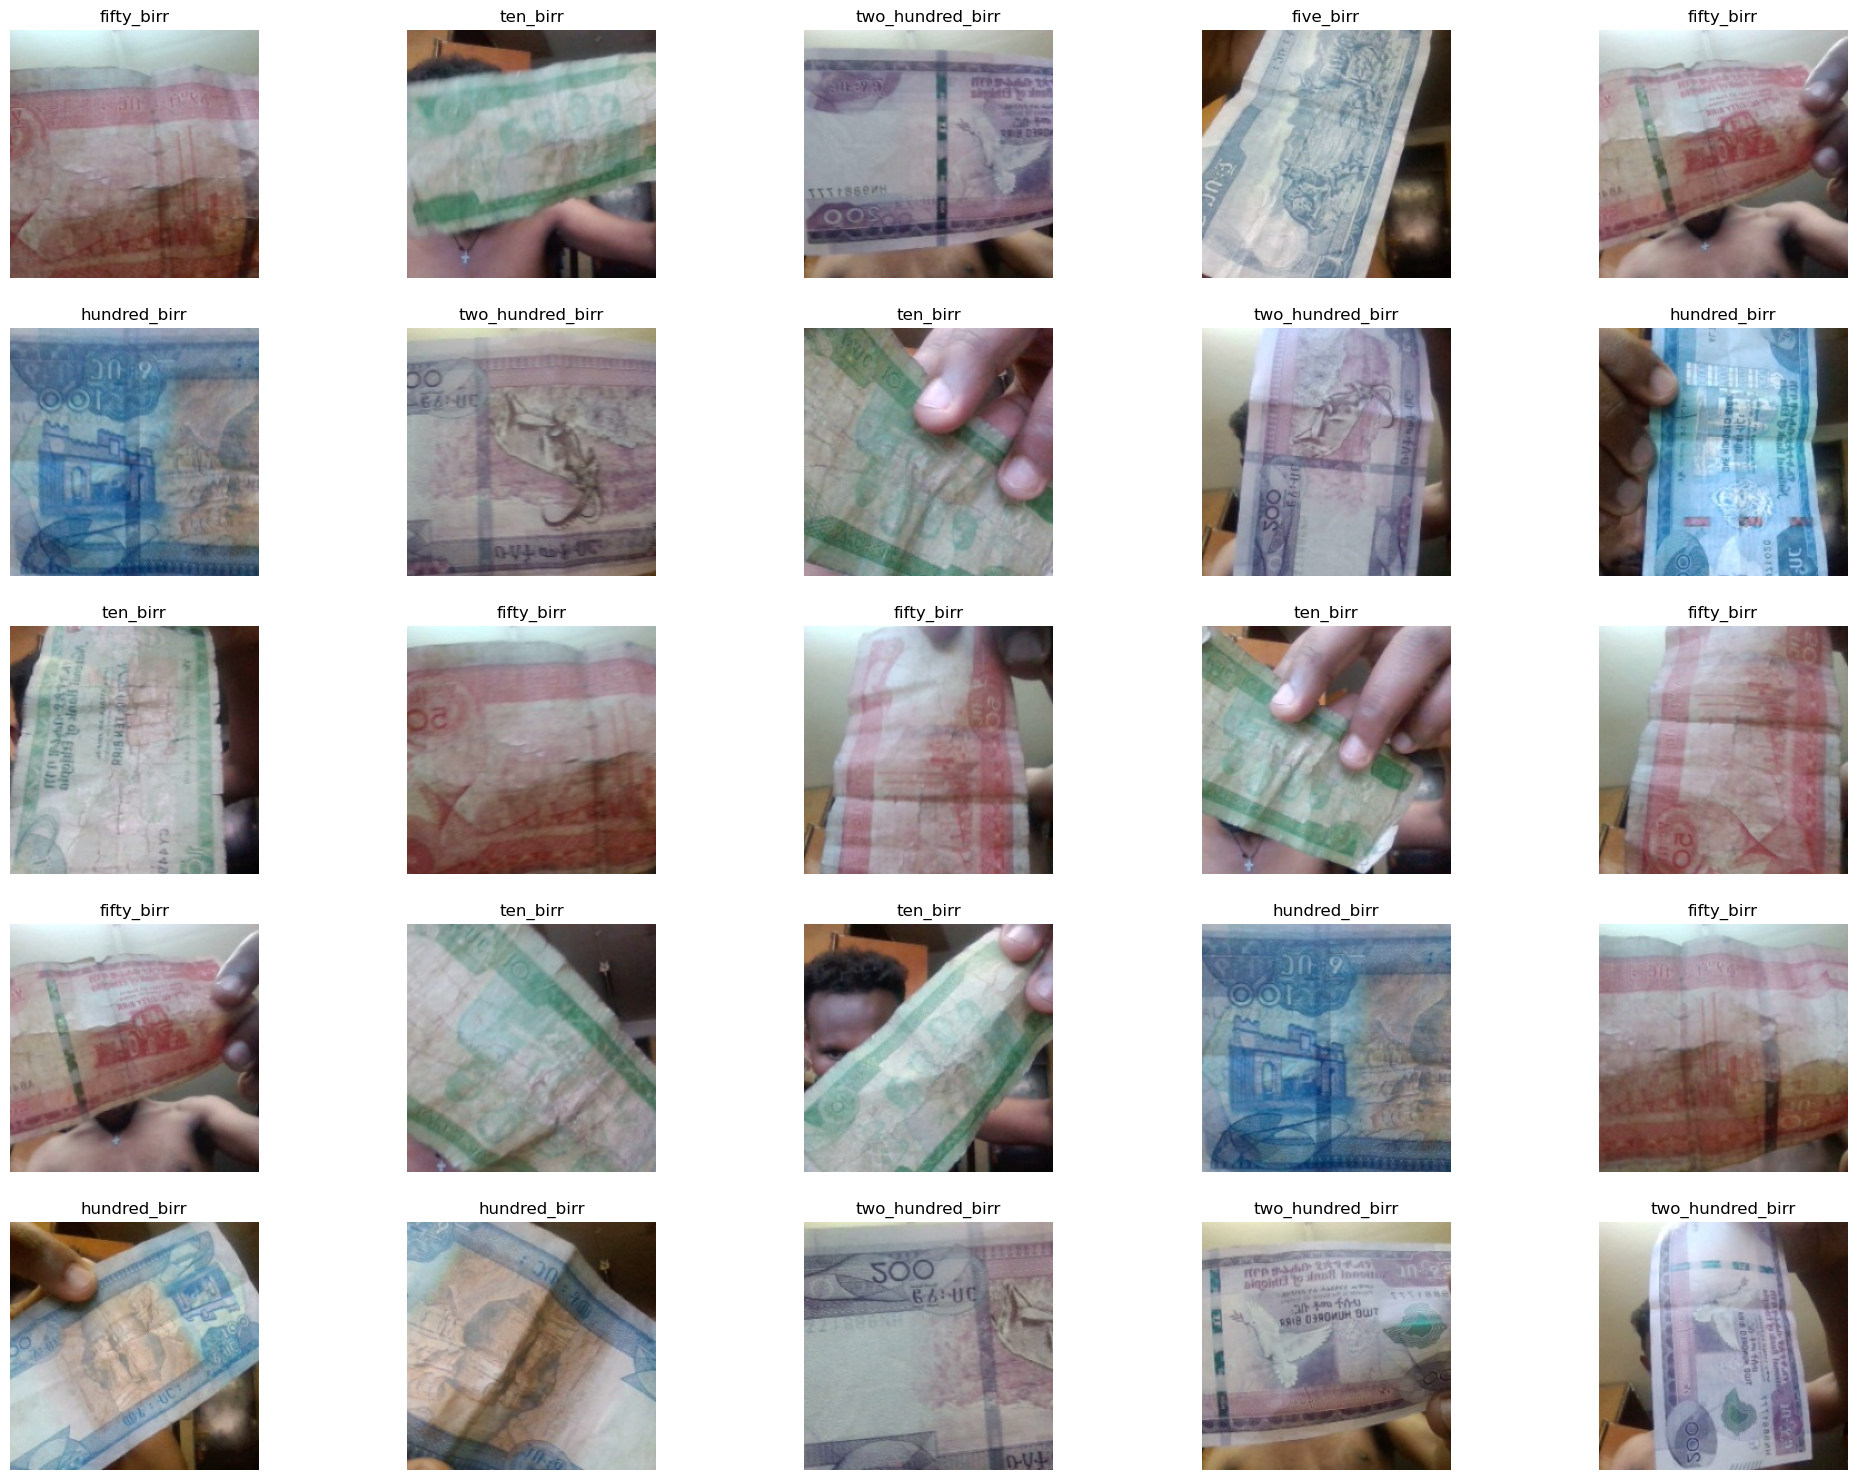

In [80]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(train_label[rnd_number]))
        ax[i,j].axis('off')

In [81]:
model = Models.Sequential()

model.add(Layers.Conv2D(150,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))


model.add(Layers.Conv2D(125,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))

model.add(Layers.Conv2D(125,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))

model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))

model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))

model.add(Layers.Conv2D(25,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))

model.add(Layers.Flatten())
model.add(Layers.Dense(100,activation='relu'))

model.add(Layers.Dense(50,activation='relu'))

model.add(Layers.Dense(25,activation='relu'))

model.add(Layers.Dropout(rate=0.2))

model.add(Layers.Dense(5,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 150)     4200      
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 125)     168875    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 125)    0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 125)     140750    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 125)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 100)      

In [82]:
trained = model.fit(train_data,train_label,epochs=8,validation_split=0.2)

Epoch 1/8
14/14 [==============================] - 279s 20s/step - loss: 1.6109 - accuracy: 0.2150 - val_loss: 1.6099 - val_accuracy: 0.1667
Epoch 2/8
14/14 [==============================] - 264s 19s/step - loss: 1.6038 - accuracy: 0.2336 - val_loss: 1.5825 - val_accuracy: 0.3611
Epoch 3/8
14/14 [==============================] - 271s 19s/step - loss: 1.4934 - accuracy: 0.3902 - val_loss: 1.3683 - val_accuracy: 0.4907
Epoch 4/8
14/14 [==============================] - 268s 19s/step - loss: 1.1527 - accuracy: 0.5140 - val_loss: 0.8483 - val_accuracy: 0.6481
Epoch 5/8
14/14 [==============================] - 272s 19s/step - loss: 1.0499 - accuracy: 0.5888 - val_loss: 0.8658 - val_accuracy: 0.6389
Epoch 6/8
14/14 [==============================] - 277s 20s/step - loss: 0.8665 - accuracy: 0.6636 - val_loss: 0.8574 - val_accuracy: 0.6389
Epoch 7/8
14/14 [==============================] - 271s 19s/step - loss: 0.8473 - accuracy: 0.6636 - val_loss: 0.6151 - val_accuracy: 0.7778
Epoch 8/8
14/

In [83]:
trained.history

{'loss': [1.6108782291412354,
  1.6038273572921753,
  1.4934159517288208,
  1.1527172327041626,
  1.049859642982483,
  0.8664695024490356,
  0.8473386168479919,
  0.5619791150093079],
 'accuracy': [0.21495327353477478,
  0.23364485800266266,
  0.3901869058609009,
  0.514018714427948,
  0.5887850522994995,
  0.663551390171051,
  0.663551390171051,
  0.7616822719573975],
 'val_loss': [1.6099481582641602,
  1.582507848739624,
  1.3683092594146729,
  0.8483227491378784,
  0.8658245801925659,
  0.8574051856994629,
  0.6151110529899597,
  0.3603267967700958],
 'val_accuracy': [0.1666666716337204,
  0.3611111044883728,
  0.49074074625968933,
  0.6481481194496155,
  0.6388888955116272,
  0.6388888955116272,
  0.7777777910232544,
  0.9166666865348816]}

In [84]:
import tensorflow as tf

In [85]:
model.save('birr_recognize.h5')

In [87]:
from tensorflow.keras.models import load_model

In [88]:
history = trained.history

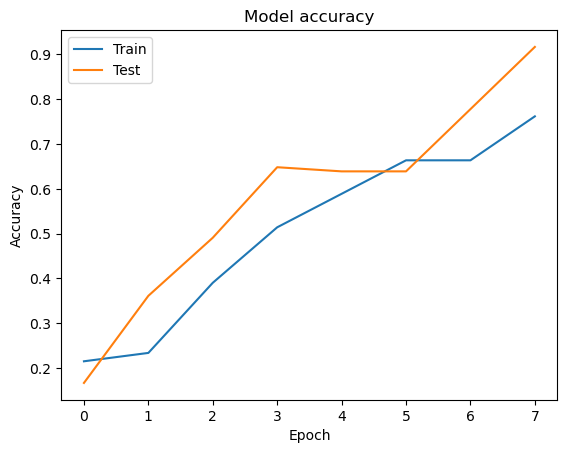

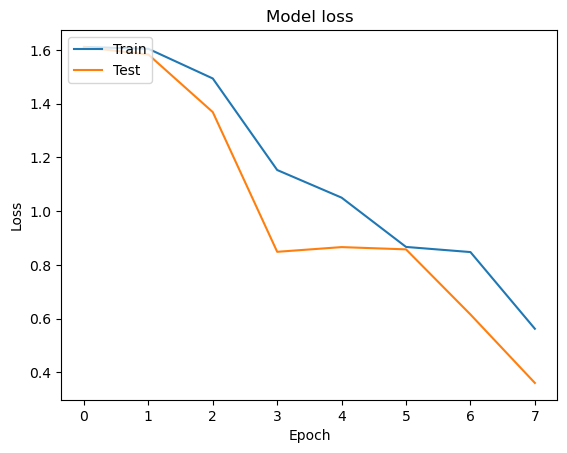

In [89]:
plot.plot(history['accuracy'])
plot.plot(history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()


plot.plot(history['loss'])

plot.plot(history['val_loss'])

plot.title('Model loss')

plot.ylabel('Loss')

plot.xlabel('Epoch')

plot.legend(['Train', 'Test'], loc='upper left')

plot.show()

In [93]:
img = cv2.imread('ten.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized = cv2.resize(img,(224,224))
pred_prob = model.predict(np.expand_dims(resized/255,0)).reshape(5)
pred_image = np.array([resized])
idx = np.argmax(pred_prob,axis=0)
pred_class = get_classlabel(idx)

print(pred_prob[idx] / sum(pred_prob) * 100)
print(pred_class)

1/1 [==============================] - 0s 254ms/step
72.62110054072713
hundred_birr


In [92]:
import time

In [148]:
# test_images, test_Labels = get_images(os.path.join('train_data')) #Extract the training images from the folders.
# test_images = np.array(test_images)/255 #converting the list of images to numpy array and also normalize the the imafe
# test_Labels = np.array(test_Labels)

In [97]:
model.evaluate(test_data,test_label, verbose=1)

5/5 [==============================] - 24s 5s/step - loss: 0.4248 - accuracy: 0.8271


[0.4247933328151703, 0.8270676732063293]

In [150]:
# pred_images = test_images

1/1 [==============================] - 0s 222ms/step


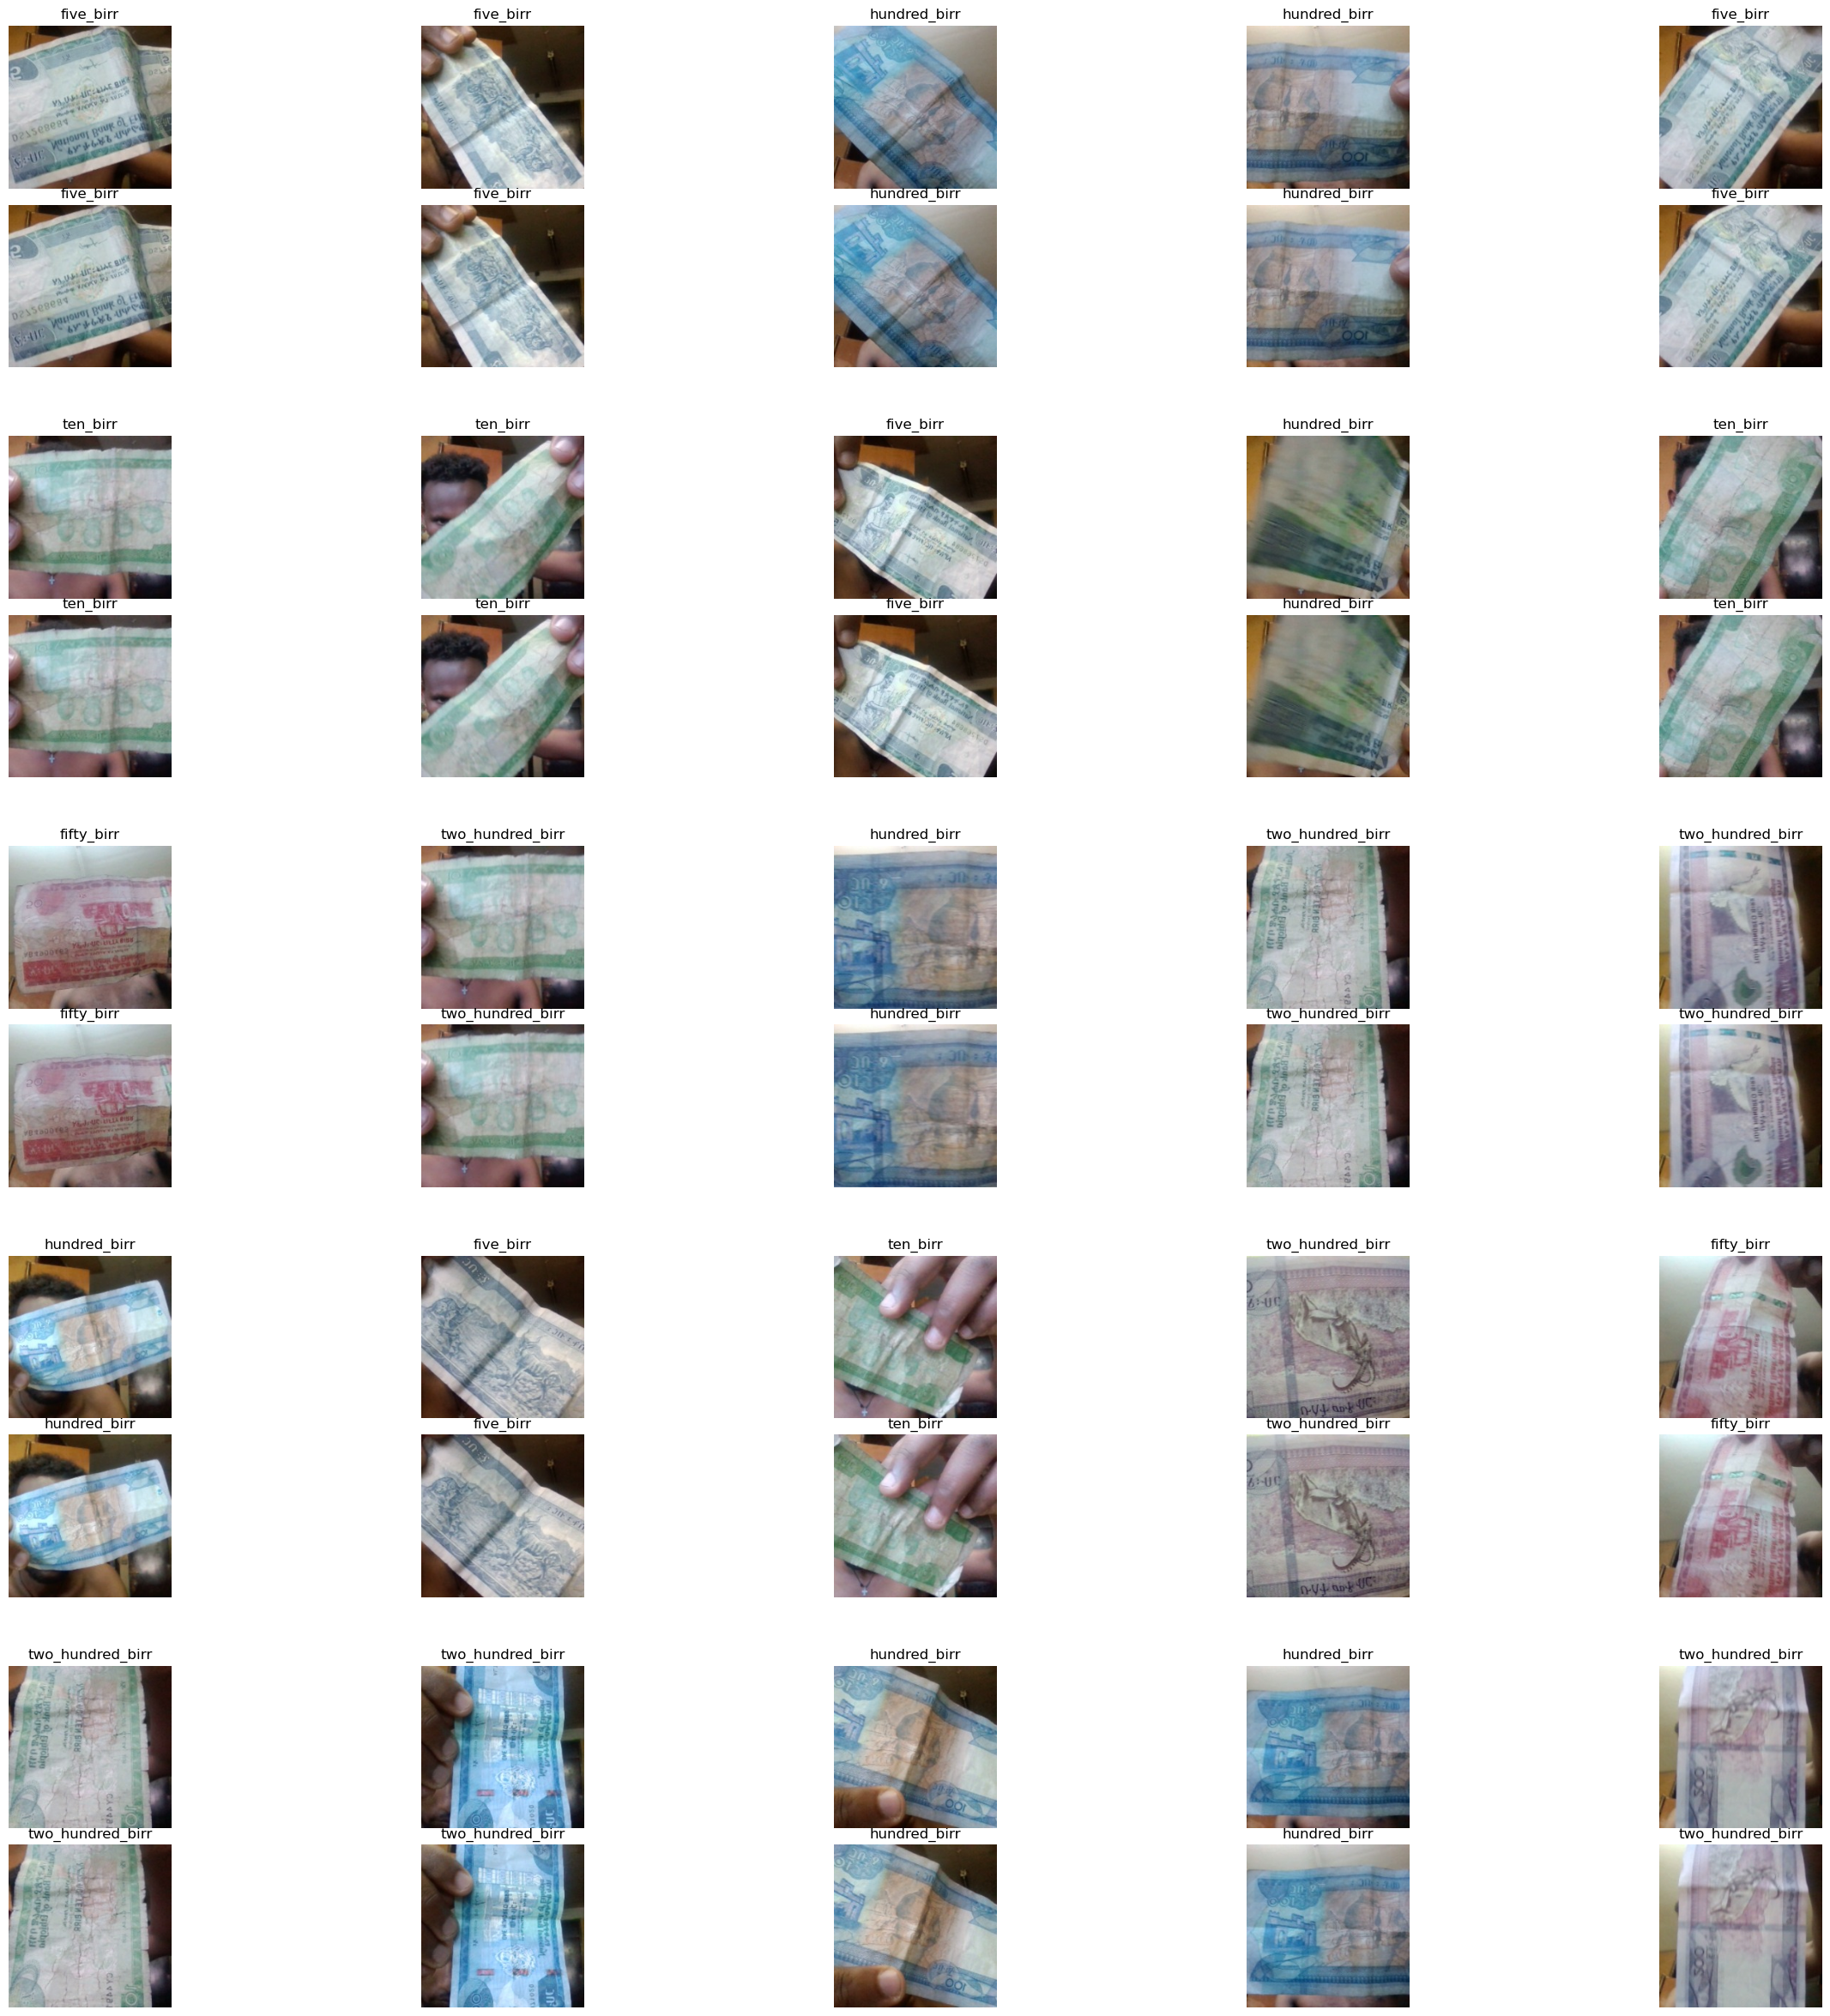

In [98]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(test_data))
    pred_image = np.array([test_data[rnd_number]])
    pred_prob = model.predict(pred_image).reshape(5)
    
    pred_class = get_classlabel(np.argmax(pred_prob,axis=0))
    for j in range(2):
        ax = plot.Subplot(fig, inner[j])
        ax.imshow(pred_image[0])
        ax.set_title(pred_class)
        fig.add_subplot(ax)
        ax.axis('off')
fig.show()

In [100]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    resized = cv2.resize(frame,(224,224))
    pred_prob = model.predict(np.expand_dims(resized/255,0)).reshape(5)
    pred_image = np.array([resized])
    idx = np.argmax(pred_prob,axis=0)
    pred_class = get_classlabel(idx)
    
    cv2.rectangle(frame, 
                      tuple(np.multiply([0.2, 0.2], [0.7,.7]).astype(int)),
                      tuple(np.multiply([0, 0], [450,450]).astype(int)), 
                            (255,0,0), 2)
    
    if pred_prob[idx] / sum(pred_prob) < .8:
        pred_class = 'Identifing ....... '
    
    cv2.putText(frame, pred_class, (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255))
    
    cv2.imshow('Detect', frame)
    time.sleep(2)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 110ms/step


In [31]:
def pridict(image):    
    yhat = model.predict(np.expand_dims(image/255, 0))
    idx = 0
    cur = 0
    tot = 0
    for ci, i in enumerate(yhat[0]):
        if i > cur:
            idx = ci
            cur = i
        tot += i
    return get_classlabel(idx), cur/tot * 100, yhat